In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

<img src="hw1-1.png"/>


<img src="hw2-2.png"/>

## Question 3b
Implement Euler’s method to find an approximate solution to (2)-(3). Using the exact solution verify the first order rate of convergence of the approximation.

In [2]:
# forward Euler's method to find appro solution
def fun(t,y):
    return (3*math.cos(t)/y**2)
def euler(steps, T,y0):
    delta_t = T/steps
    t = np.linspace(0,T,steps)
    y=[y0]
    for i in range(len(t)-1):  
        y.append(y[i]+delta_t*fun(t[i],y[i]))
    return t,y

    

In [3]:
def exact_fun(steps,T):
    t = np.linspace(0,T,steps)
    y=np.array([])
    for i in range(len(t)):
        yn=(9*math.sin(t[i])+1)**(1/3)
        y=np.append(y,yn)
    return y
# compute total error using N=50 to approximate
error_50 =sum(abs(exact_fun(50,1) - np.array(euler(50,math.pi,1)[1])))
#useN=100 
error_100=sum(abs(exact_fun(51,1) - np.array(euler(51,math.pi,1)[1])))

data = {'$N$':[50,51], 'Error': [error_50, error_100] }
print("The rate of convergence is:",error_50/error_100)
pd.DataFrame(data)

The rate of convergence is: 0.9805067068539919


,$N$,Error
0,50,17.807434
1,51,18.161461


## Question 3c

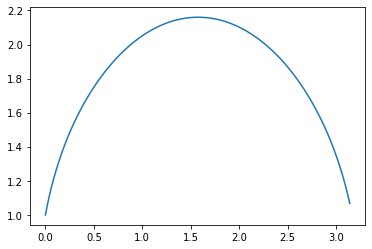

In [4]:
# plot approximation with 300 steps
t,y=euler(300,math.pi,1)
plt.plot(t,y)

## Question 4b
Verify the expected order of convergence and plot the approximation for a sufficiently small ∆t.

In [9]:
def euler_second(step,T):
    delta_t = T/step
    t = np.linspace(0,T,step)
    y1=np.zeros(step)
    y2=np.zeros(step)
    y1[0] = 1
    y2[0] = 0
    
    for i in range(step-1):  
        y1[i+1] = y1[i]+y2[i]*delta_t
        y2[i+1] = y2[i] -delta_t*( 0.2*y2[i]+4*y1[i])
    return t,y1,y2


t,y1,y2 = euler_second(200,5)    
t2,y1_200,y2_200 = euler_second(400,5)
t4,y1_400,y2_400 = euler_second(800,5)

y1_200_even =y1_200[::2]
y1_400_even =y1_400[::2]



To find the order of convergence:

$ y = A_h +ch^p \\ y = A_{h/2} +c(h/2)^p  \\ y = A_{h/4} +c(h/4)^p  $

## $p = log_2{\frac{(A_{h/2} - A_h)}{(A_{h/4} - A_{h/2})}}$

In [16]:
p = np.log2((abs(y1_200[-1] - y1[-1]))/(abs(y1_400[-1] - y1_200[-1])))

print("P is", p," which is approximately 1, the order of convergence")

P is 1.159644704142528  which is approximately 1, the order of convergence


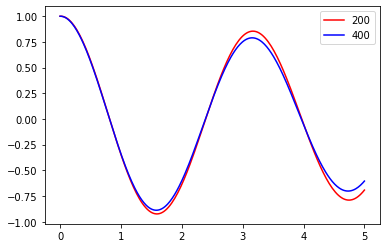

In [11]:
# plot approximation
plt.plot(t,y1,color = 'red', label = "200")
plt.plot(t2,y1_200,color = 'blue', label = "400")
plt.legend()